**FindKth**

В рандомизированной версии алгоритма поступают как в быстрой сортировке: случайно выбирают элемент, смотрят на его позицию и рекурсиивно запускаются на подмассиве

In [3]:
from typing import List

In [ ]:
def test_kth(kth):
    test_examples=[[1,2,3],[5,4,3,2,1],[-3,-2,-6,3,1,6,1000,-3,-7,-12,100000],[5,4,3,1,2,3],[3]*21+[4]*30,[3]*21+[4]*30]
    test_queries = [2,1,10,6,20,45]
    test_answers = [2,1,1000,5,3,4]
    for i,(ex, k, ans) in enumerate(zip(test_examples,test_queries,test_answers)):
        res = kth(ex,k)
        assert res==ans, f'test case error {i}, res {res} but answer {ans}'
    n = len(test_examples)
    return f'{n}/{n} tests passed'    

In [ ]:
def random_tester_kth(kth,num_tests=100,len_arr=10):
    for test in range(num_tests):
        ex = []
        for i in range(0,len_arr):
            ex.append(random.randint(0,100))
        k = random.randint(1,len_arr)
        res = determ_kth(ex,k)
        ex.sort()
        ans = ex[k-1]
        assert res==ans
    return f'{num_tests}/{num_tests} tests passed'

In [ ]:
def random_kth(a: List[int],k,l=None,r=None):
    ''' return kth statistics from arr
    assumption, that arr is not empty and parameter k is corrected'''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    assert r!=l, f'r={r},l={l}'
    if r-l==1:
        return a[l]
    id_ = partition(a,l,r)
    if id_==k-1:
        return a[id_]
    if id_>k-1:
        return random_kth(a,k,l,id_)
    else:
        return random_kth(a,k,id_,r)
test_kth(random_kth)
random_tester_kth(random_kth)

В детерменированной версии делят на пятерки, находят там медианы, находят медиану медиан и разбивают относительно неё. 

Оба алгоритма работают на линейное время, при этом на практике рандомизированный быстрее.

In [ ]:
def partition_5(a = List[int], l=None,r=None,id_=None):
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    n = (r-l)//5
    medians = []
    for i in range(n):
        block = a[l+5*i:l+5*i+5]
        block.sort()
        medians.append(block[2])
    val = determ_kth(medians,n//2)
    # calculate id median of medians
    for i in range(l,r):
        if a[i]==val:
            id_=i
    # partition for this id
    x = a[id_]
    a[l],a[id_] = a[id_],a[l]
    i,j = l+1, r-1
    while i<=j:
        if a[i]>x:
            a[j],a[i]=a[i],a[j]
            j-=1
        else:
            i+=1
    a[l],a[i-1]=a[i-1],a[l]    
    return i-1

def determ_kth(a: List[int],k,l=None,r=None):
    ''' return kth statistics from arr
    assumption, that arr is not empty and parameter k is corrected'''
    if l is None:
        l = 0
    if r is None:
        r = len(a)
    if r-l==1:
        return a[l]
    if r-l<=50:
        t = a[l:r]
        t.sort()
        return t[k-l-1]
    id_ = partition_5(a,l,r)
    if id_==k-1:
        return a[id_]
    if id_>k-1:
        return determ_kth(a,k,l,id_)
    else:
        return determ_kth(a,k,id_,r)
test_kth(determ_kth)
random_tester_kth(determ_kth)

**BinSearch**

Общая инструкция к построению:
* в зависимости от того, нам надо крайнее левое или крайнее правое вхождение, определить границы
* проверить выход из цикла r-l>1

Для примера, если мы ищем самое первое вхождение, то мы поддерживаем инвариант $a[r] > key$, и когда мы выйдем из цикла, надо убедиться, что мы в массиве и элемент реально есть.

При такой инициализации границ мы средним будем попадать всегда внутрь массива, можно мыслить это как фиктивные элементы $\pm \infty$ на границах массива.

In [2]:
def bin_search(a: List[int], target: int)->int:
    l,r = -1, len(a)
    while r-l>1:
        m = r+l//2
        if a[m] > target:
            r = m
        else:
            l = m
    if l ==-1 or a[l]!=target:
        return -1
    else:
        return l

**Dynamic Programming**

* задача о кузнечике (сколько путей существует? либо экстремальную стоимость)


* задача о наибольшей возрастающей подстроке; $f_j$ - длина максимальной подстроки с концом в месте $j$, вычисляются последовательно слева направо, суммарное время $\mathcal{O}(n^2)$


* бинарная задача о рюкзаке, решаемая за $\mathcal{O}(n \cdot W)$, через состояния $b_{i,w}$ - это когда можно предметы $1,\dots,i$ и суммарный вес ровно $w$


* задача о расстановке скобок в произведении матриц; $f_{L,R}$ - стоимость вычислений матриц от $L$ до $R$, можно вычислять рекурсивно, если все внутренние посчитаны, а заполнять эту таблицу будем по двум циклам: длина отрезка, левая граница; можно решить рекурсивно с кэшированием; время на вычисления $\mathcal{O}(n^3)$


* поиск независимого множества максимального веса в дереве. решается через подвешивания + dfs( ) (при покидании вершины мы обновляем её возможные стоимости "взята" "не взята"), важно построить списки смежности

In [4]:
def dfs(v,p):
    # нужны списки смежности для v
    for vu in E:
        if u!=p:
            dfs(u,v)
            # calculating
        

**Greedy Algorithms**

* код Хаффмана: две редчайшие буквы объединияем в один лист с новой частотой, строя при этом дерево; $\mathcal{O}(n \log n)$ с приоритетной очередью


* задача про возможное выполнение работ на одном станке (единичные затраты!): выполняем все доступные, у которых близко дедлайн


* задача про замощение полуинтервалами: сортировка по концам работ с отбрасыванием


* задача с коробками: интересная плотность для жадного алгоритма, появилась вполне естественно из условия допустимости $\rho_i = s_i + M_i$

Максимально общий подход к этому принципу может быть описан на языке матроидов.

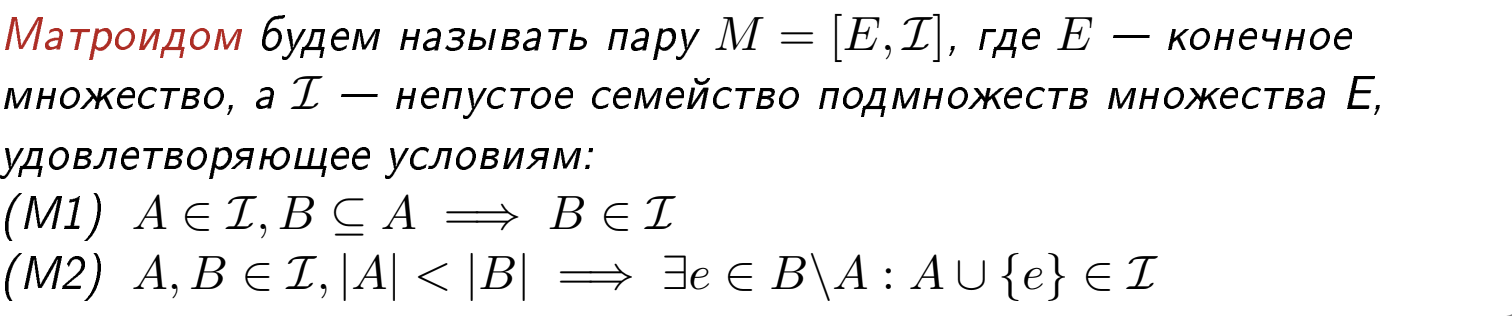

**"Жадный" алгоритм:**
* упорядочиваем веса по плотности
* идем в порядке убывания плотности и добавляем новый элемент, если получаем независимое множество

Для такого "жадного" алгоритма справедлива следующая теорема 
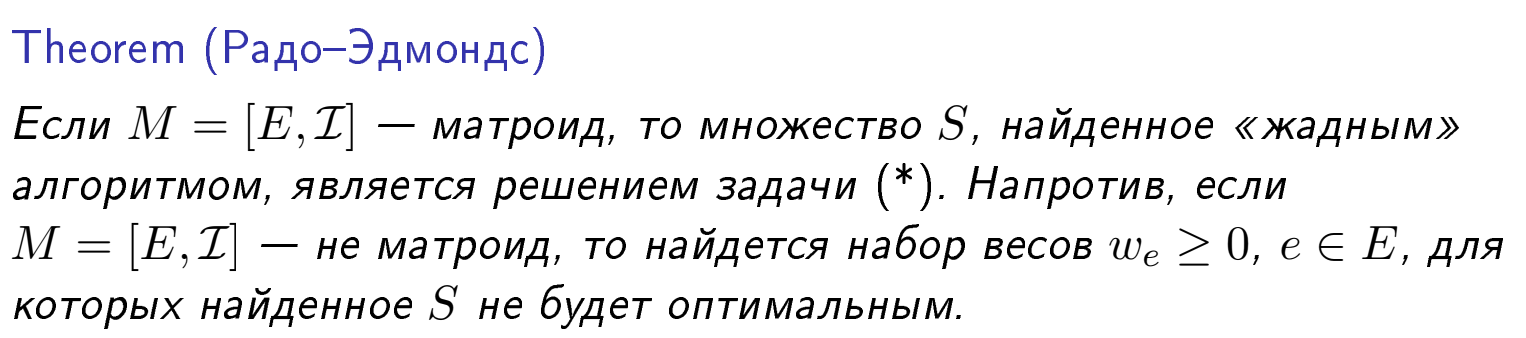

**RMQ**

Дан массив чисел. Требуется сделать предобработку таким образом, чтобы достичь баланса между временем на препроцессинг и ответами на  многочисленные запросы типа: "найди минимум на подотрезке $[a_L, a_R]$".

Возможные решения:
* наивный метод - не делать препроцессинг и отвечать за $\mathcal{O}(n)$
* lookup table метод - подготовить сразу все ответы. Это $\mathcal{O}(n^2)$ на препроцессинг и $\mathcal{O}(1)$ на ответ
* lookup sparse table метод - подготовить ответы на подотрезках $f(i,k): = min [a_i, a_{i+2^k}]$. Также подготовить значения $k$ для всех разниц $R-L+1$ (логарифм вычислять за $\mathcal{O}(1)$ мы не умеем). Ответ - это  $min \left[f(R-2^k+1,k), f(L,k)\right]$, ресурсы - $\mathcal{O}(n \log n)$ на препроцессинг и $\mathcal{O}(1)$ на ответ

**LCA**

Дано подвешенное дерево. Требуется отвечать на запросы типа: "самый нижний общий предок вершин $u,v$".

Её можно свести к задаче RMQ следующим образом:
* Пройти dfs'ом по дереву и назначить каждой вершине её глубину, одновременно создавая массив по каждой пройденной вершине из ребёр. Размер созданного массива порядка $2n$
* Также сохранить для каждой вершины её позицию (любую) в созданном массиве
* Утверждается, что нижний общий предок $u,v$ - это вершина-решение задачи RMQ на отрезке между любыми вхождениями $u,v$. 

Самое интересное, что **задачу RMQ можно свести к задаче LCA**, а затем обратно. Только из свойств построенного массива разница любых двух элементов массива равна: $|a_i - a_{i+1}| = 1$. Сведение устроено следующим образом:
* нам дан массив $(a_1, \dots, a_n)$
* строим декартово дерево с ключами и приоритетами $(i, a_i)$ (за линейное время, так как массив уже отсортирован по ключам)
* после этого LCA(L,R) - это RMQ( [L,R] ): первый раз, когда вершины окажутся в разных поддеревьях - это разбиение по наименьшему приоритету, то есть по min $a_i$, где i лежит между L и R

Как решать **RMQ $\pm$ 1 (алгоритм Фарах-Колтона Бендера)** за $\langle\mathcal{O}(n)$,  $\mathcal{O}(1)\rangle$?
* можно свести всё к разнице соседей (массиву из 0 и 1), вычислить $0.5 \log n$
* разбить весь массив на блоки длины $0.5\log n$,  создать для каждой вершины индекс ближайшего слева и справа блока, после чего подсчитываем внутри блоков минимумы и на полученном массиве минимумов строим sparse-table, всё за $\mathcal{O}(n)$
* на всевозможных подотрезках последовательности из 0 и 1 длины $0.5\log n$ вычисляем позиции минимумов за $\mathcal{O}(\sqrt{(n)} \log^2 n)$
* теперь, когда нам приходит $(L,R)$, мы смотрим на ближайший справа блок от L, ближайший слева блок от R (если они внутри одного блока, то вычисляем сразу по маске), смотрим минимум из sparse table между блоками и сравниваем с минимумами по краям блоков. Это всё $\mathcal{O}(1)$

**Дерево отрезков (Диадические интервалы)**

**Interface**:
* func(L,R)
* update(L,R)

Структура часто применяется для многочисленных запросов-изменений значений на отрезках. Важно, чтобы функция для подсчета и функция изменения значений были ассоциативны и дистрибутивны. Тогда за $\mathcal{O}(\log n)$ выполняются операции. Обновление можно делать ленивым образом также за логарифм времени: при необходимости протолкнуть обновление ниже разбиения по отрезкам мы сделаем это во время подсчета функции.

**Пример применения**

Задача на поиск максимального пересечения прямоугольника, либо площади, покрытой максимальным количеством прямоугольников.
Вместо тупого построения всех прямоугольничков за $\mathcal{O}(n^2)$ можно перейти к дереву отрезков, каждый апдейт - это горизонтальная граница прямоугольника. В качестве операции считать либо максимум, либо её модфикацию: на парах $\langle max, length \rangle$ определить сложение: если максимумы совпадают, то длины суммируются, иначе берем максимальный максимум и его длину.